## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost,listed_in
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### Shape of the dataset

In [9]:
df.shape

(148, 7)

### 2.2 Dataset information

- name : Restaurant names 
- online_order : Yes/No
- book_table : Yes/No
- rate : customer provided ratings 
- votes : voting for reataurants
- approx_cost(for two people):restaurant food cost for two people
- listed_in(type):reataurant type

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [10]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
approx_cost     0
listed_in       0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          148 non-null    object 
 1   online_order  148 non-null    object 
 2   book_table    148 non-null    object 
 3   rate          148 non-null    float64
 4   votes         148 non-null    int64  
 5   approx_cost   148 non-null    int64  
 6   listed_in     148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

name            145
online_order      2
book_table        2
rate             19
votes            90
approx_cost      18
listed_in         4
dtype: int64

### 3.5 Check statistics of data set

In [14]:
df.describe()

,rate,votes,approx_cost
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


#### Insight
- From above description of numerical data, all means are very much away from each other - between 3.6 and 418.2;
- All standard deviations are also very much away - between 0.4 and 653.67;
- While there is a minimum vote  0 , for approx_cost(for two people) minimum is much higher = 100 and for rate = 2.6

### 3.7 Exploring Data

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost,listed_in
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [16]:
print("Categories in 'name' variable:",end=" " )
print(df['name'].unique())

print("Categories in 'online_order' variable:",end=" ")
print(df['online_order'].unique())

print("Categories in'book_table' variable:",end=" " )
print(df['book_table'].unique())

print("Categories in 'listed_in(type)' variable:",end=" " )
print(df['listed_in'].unique())

Categories in 'name' variable: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' 'Addhuri Udupi Bhojana'
 'Grand Village' 'Timepass Dinner'
 'Rosewood International Hotel - Bar & Restaurant' 'Onesta'
 'Penthouse Cafe' 'Smacznego' 'Village CafÃ©' 'Cafe Shuffle'
 'The Coffee Shack' 'Caf-Eleven' 'Cafe Vivacity' 'Catch-up-ino'
 "Kirthi's Biryani" 'T3H Cafe' '360 Atoms Restaurant And Cafe'
 'The Vintage Cafe' 'Woodee Pizza' 'Cafe Coffee Day' 'My Tea House'
 'Hide Out Cafe' 'CAFE NOVA' 'Coffee Tindi' 'Sea Green Cafe' 'Cuppa'
 "Srinathji's Cafe" 'Redberrys' 'Foodiction' 'Sweet Truth'
 'Ovenstory Pizza' 'Faasos' 'Behrouz Biryani' 'Fast And Fresh'
 'Szechuan Dragon' 'Empire Restaurant' 'Maruthi Davangere Benne Dosa'
 'Chaatimes' 'Havyaka Mess' "McDonald's" "Domino's Pizza" 'Hotboxit'
 'Kitchen Garden' 'Recipe' 'Beijing Bites' 'Tasty Bytes' 'Petoo'
 'Shree Cool Point' 'Corner House Ice Cream' 'Biryanis And More'
 'Roving Feast' 'FreshMenu' 'Banashankari Donne Biriyani' 'Wamama'
 'Five Star Chicken' 'X

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['rate', 'votes', 'approx_cost']

We have 4 categorical features : ['name', 'online_order', 'book_table', 'listed_in']


In [18]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost,listed_in
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [19]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost,listed_in
0,Jalsa,Yes,Yes,4.1,775,800,Buffet


### 3.8 Adding column for "Average" of approx_cost(for two people)

In [20]:
df['total'] = df['rate'] + df['votes'] + df['approx_cost']
df['average'] = df['total']/3
df.head()

,name,online_order,book_table,rate,votes,approx_cost,listed_in,total,average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1579.1,526.366667
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,1591.1,530.366667
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,1721.8,573.933333
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,391.7,130.566667
4,Grand Village,No,No,3.8,166,600,Buffet,769.8,256.600000


In [21]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost,listed_in,total,average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1579.1,526.366667
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,1591.1,530.366667


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          148 non-null    object 
 1   online_order  148 non-null    object 
 2   book_table    148 non-null    object 
 3   rate          148 non-null    float64
 4   votes         148 non-null    int64  
 5   approx_cost   148 non-null    int64  
 6   listed_in     148 non-null    object 
 7   total         148 non-null    float64
 8   average       148 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 10.5+ KB


In [23]:
#rate_full = df[df['rate'] == 5]['average'].count()
#votes_full = df[df['votes'] == 5000]['average'].count()
#approx_cost_full = df[df['approx_cost'] == 1000]['average'].count()

#print(f'Average ratings: {rate_full}')
#print(f'Average votings: {votes_full}')
#print(f'Average approx_cost: {approx_cost_full}')

# Ensure 'approx_cost(for two people)' column is accessible by renaming it
#df.rename(columns={'approx_cost(two people)': 'approx_cost_for_two'}, inplace=True)

# Filter for rows where 'rate', 'votes', and 'approx_cost_for_two' match specific values
rate_full = df[df['rate'] == 4.6]['average'].count()
votes_full = df[df['votes'] == 4884]['average'].count()
approx_cost_full = df[df['approx_cost'] == 950]['average'].count()

# Print the results
print(f'Average ratings: {rate_full}')
print(f'Average votings: {votes_full}')
print(f'Average approx_cost: {approx_cost_full}')

Average ratings: 2
Average votings: 1
Average approx_cost: 1


In [24]:
rating_less_3 = df[df['rate'] <= 3]['average'].count()
voting_less_2000 = df[df['votes'] <= 2000]['average'].count()
approx_cost_less_300 = df[df['approx_cost'] <= 300]['average'].count()

print(f'Ratings with less than 3 : {rating_less_3}')
print(f'Voting with less than 2000 : {voting_less_2000}')
print(f'approx_cost with less than 300 : {approx_cost_less_300}')

Ratings with less than 3 : 12
Voting with less than 2000 : 144
approx_cost with less than 300 : 67


#####  Insights
 - From above values we get ratings less than 3 are only 12 count
 - Voting with than 2000 are 144 count
 - And approx_cost with less than 300 is only 67 count

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

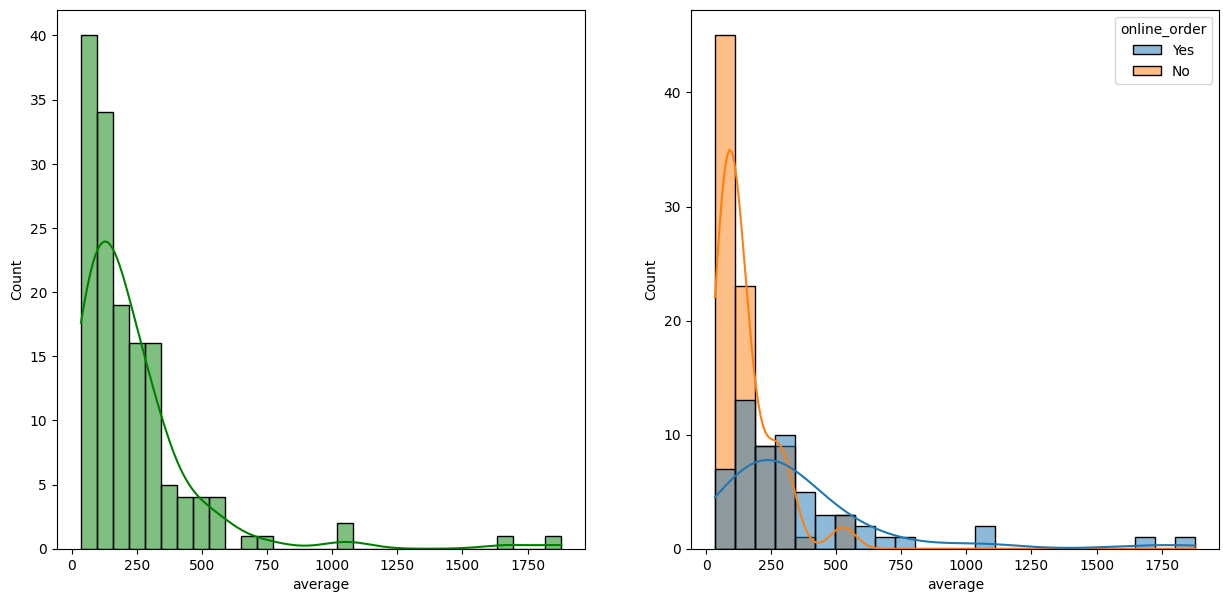

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='online_order')
plt.show()

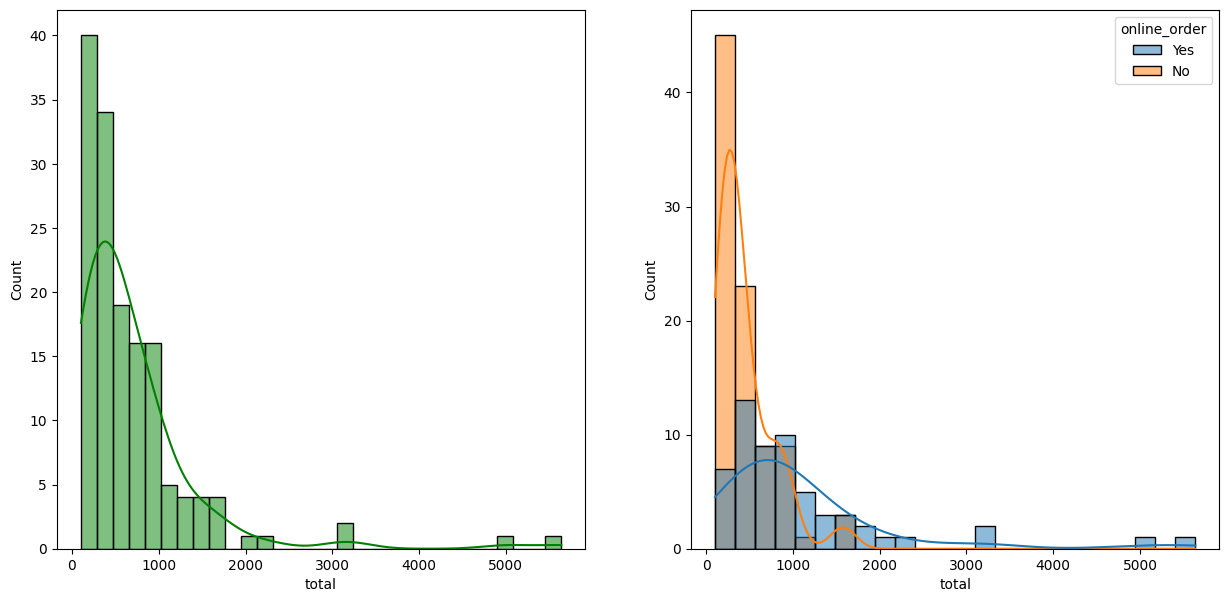

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total',kde=True,hue='online_order')
plt.show()

#####  Insights
- Online orders are less compared to offline orders.

In [27]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost,listed_in,total,average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1579.1,526.366667


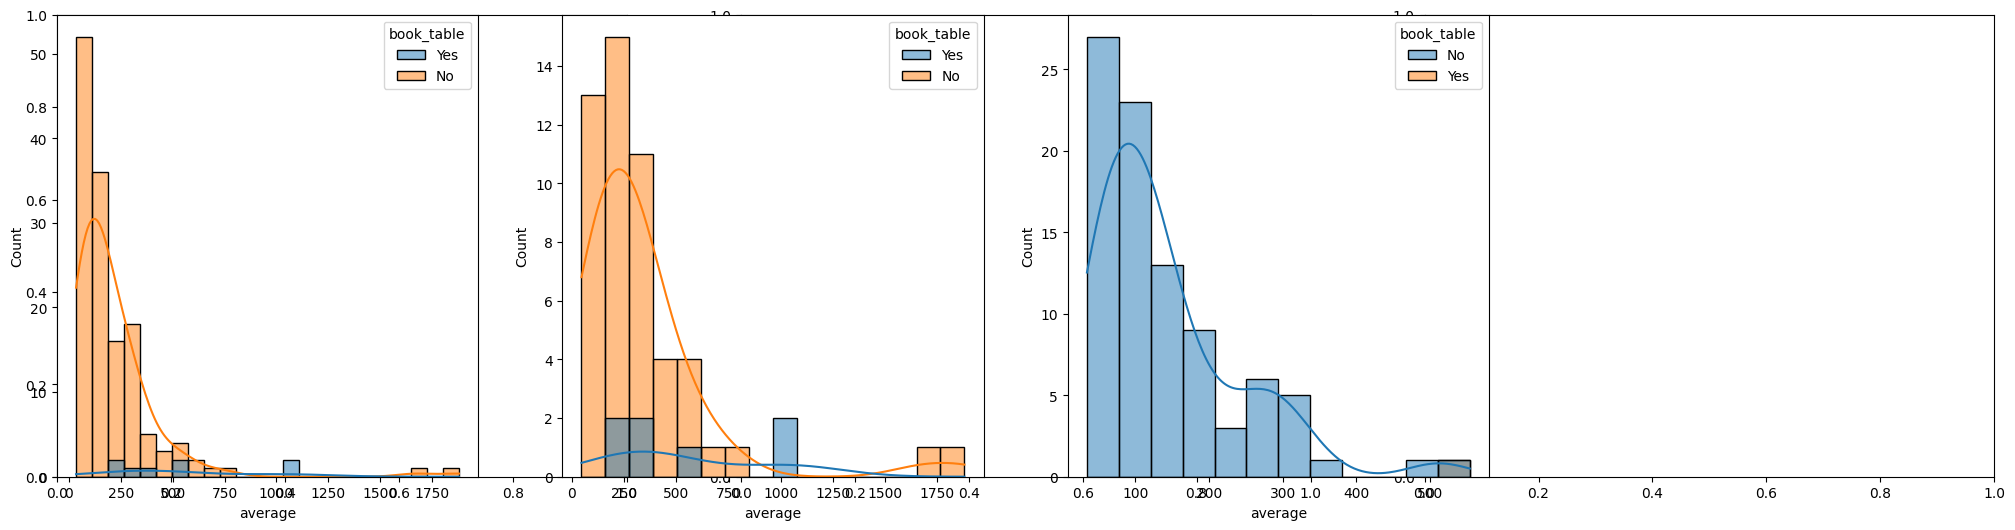

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='book_table')
plt.subplot(142)
sns.histplot(data=df[df.online_order == 'Yes'],x='average',kde=True,hue='book_table')
plt.subplot(143)
sns.histplot(data=df[df.online_order == 'No' ],x='average',kde=True,hue='book_table')
plt.show()

#####  Insights
- From 2nd histogram we can see that less tables are booked through online and more are booked offline.
- From 3rd histogram we can see that highest table booking is though offline mode.

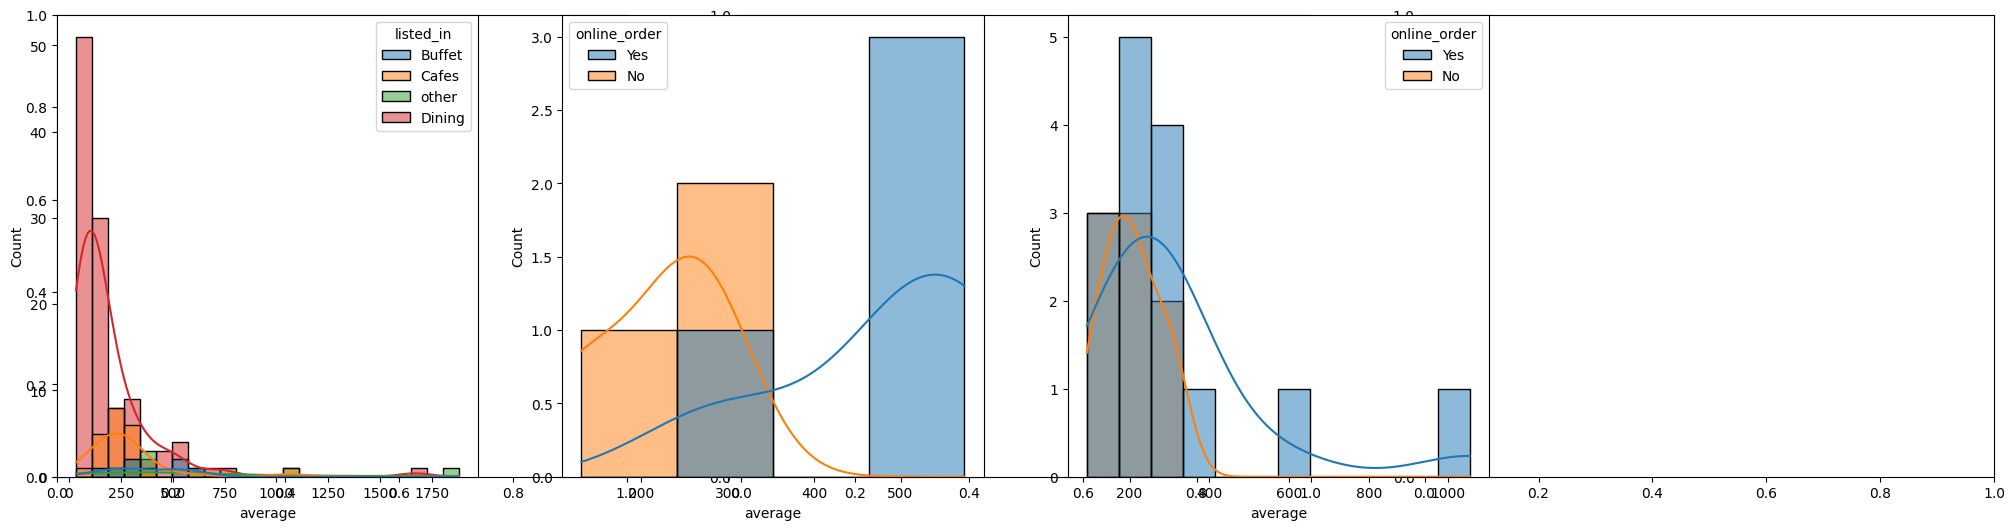

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='listed_in')
plt.subplot(142)
ax =sns.histplot(data=df[df.listed_in=='Buffet'],x='average',kde=True,hue='online_order')
plt.subplot(143)
ax =sns.histplot(data=df[df.listed_in=='Cafes'],x='average',kde=True,hue='online_order')

plt.show()

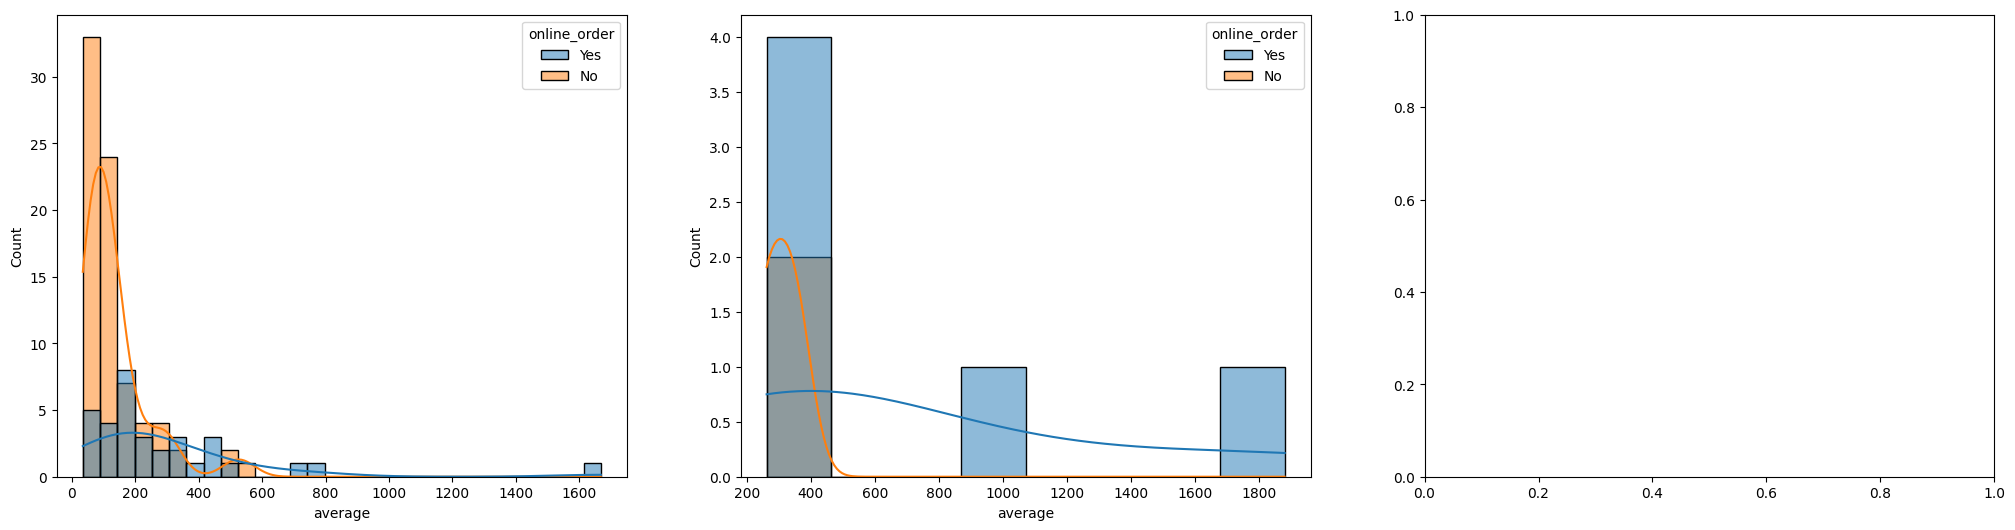

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df[df.listed_in=='Dining'],x='average',kde=True,hue='online_order')
plt.subplot(132)
ax =sns.histplot(data=df[df.listed_in=='other'],x='average',kde=True,hue='online_order')
plt.show()

#####  Insights
- 2nd plot shows more online orders are for Buffet category
- 3rd plot shows that almost all the online orders are for Cafes category
- 4th plot shows there are more offline orders for Dining category
- 5th plot shows online orders are more in other category as compared to offline

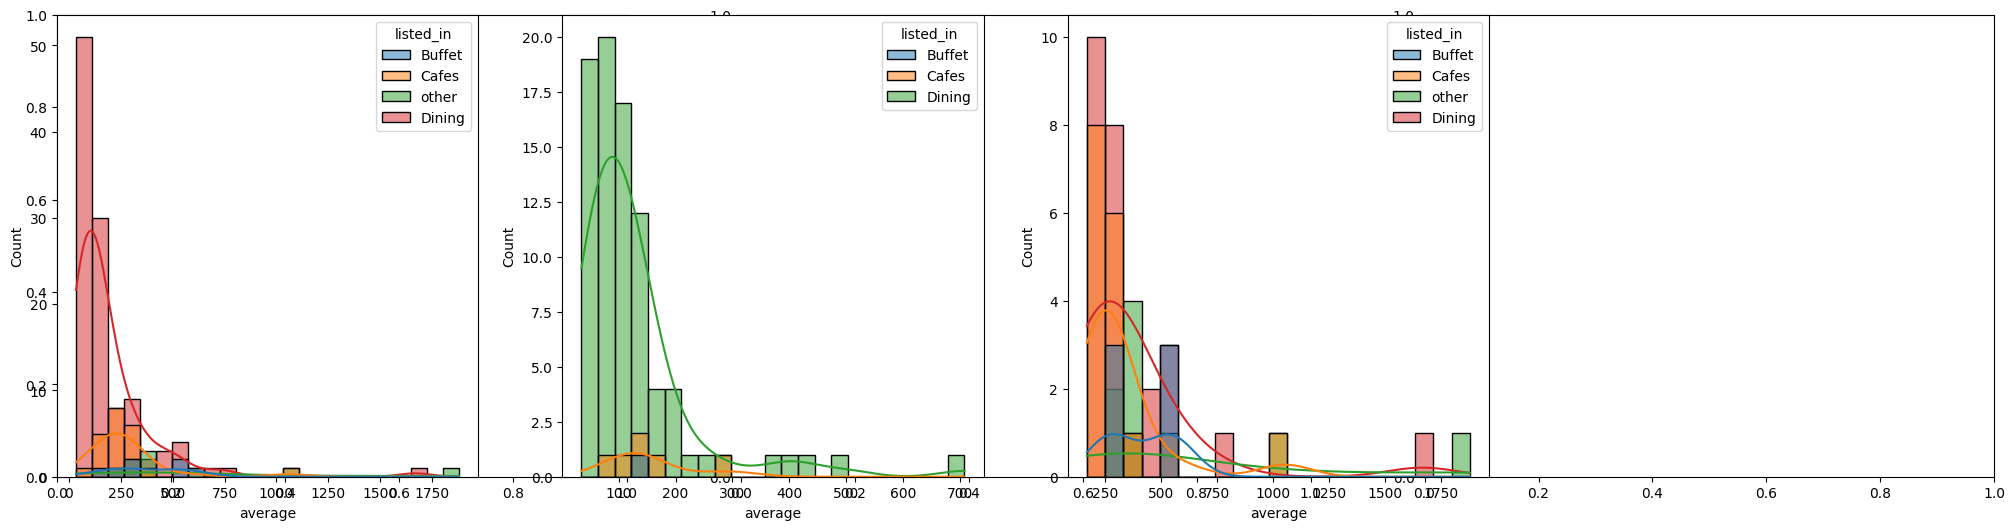

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='listed_in')
plt.subplot(142)
ax =sns.histplot(data=df[df.approx_cost<=450],x='average',kde=True,hue='listed_in')
plt.subplot(143)
ax =sns.histplot(data=df[df.approx_cost>450],x='average',kde=True,hue='listed_in')
plt.show()

#####  Insights
- 2nd plot shows people spend more on Dining orders compared to Cafes and Buffet
- 3rd plot shows spend on Buffet orders is very less compared to Cafes,Dining and others

#### 4.2 Maximum cost spent for which order

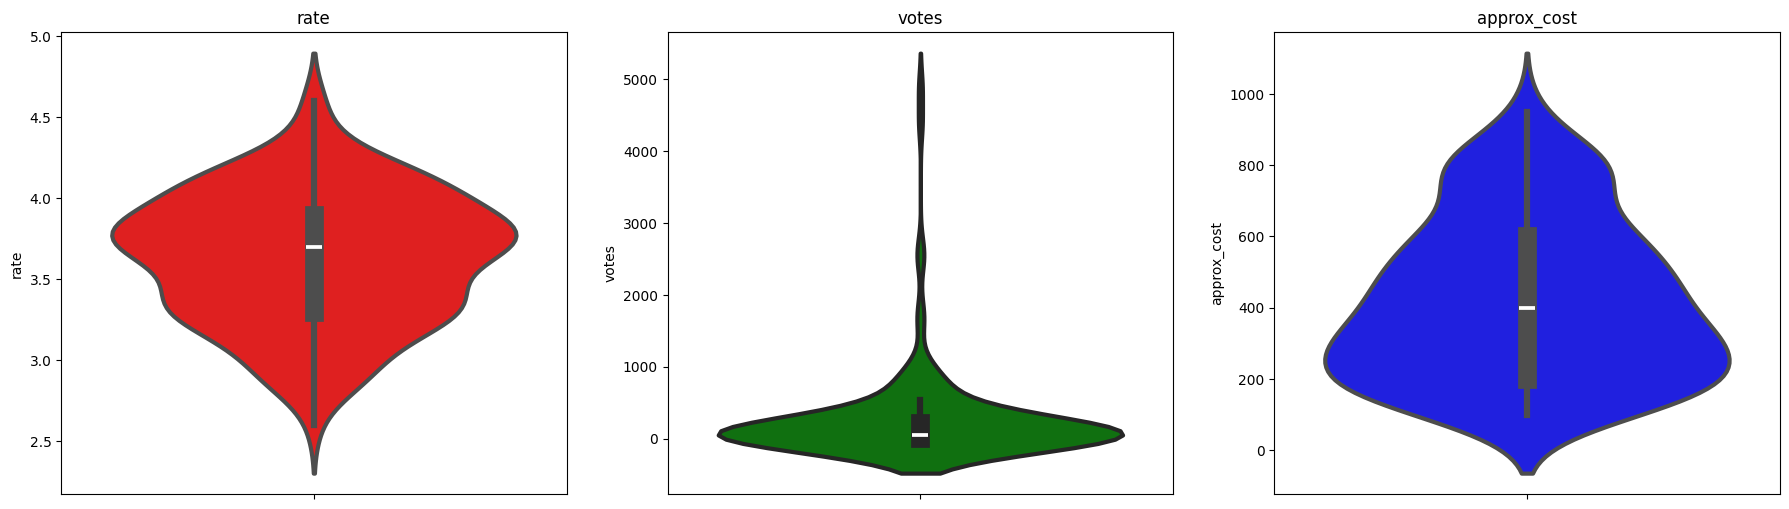

In [32]:

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('rate')
sns.violinplot(y='rate',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('votes')
sns.violinplot(y='votes',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('approx_cost')
sns.violinplot(y='approx_cost',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that maximum rating is 4.6, maximum voting is around 4800 and maximum cost is 950

#### 4.3 Multivariate analysis using pieplot

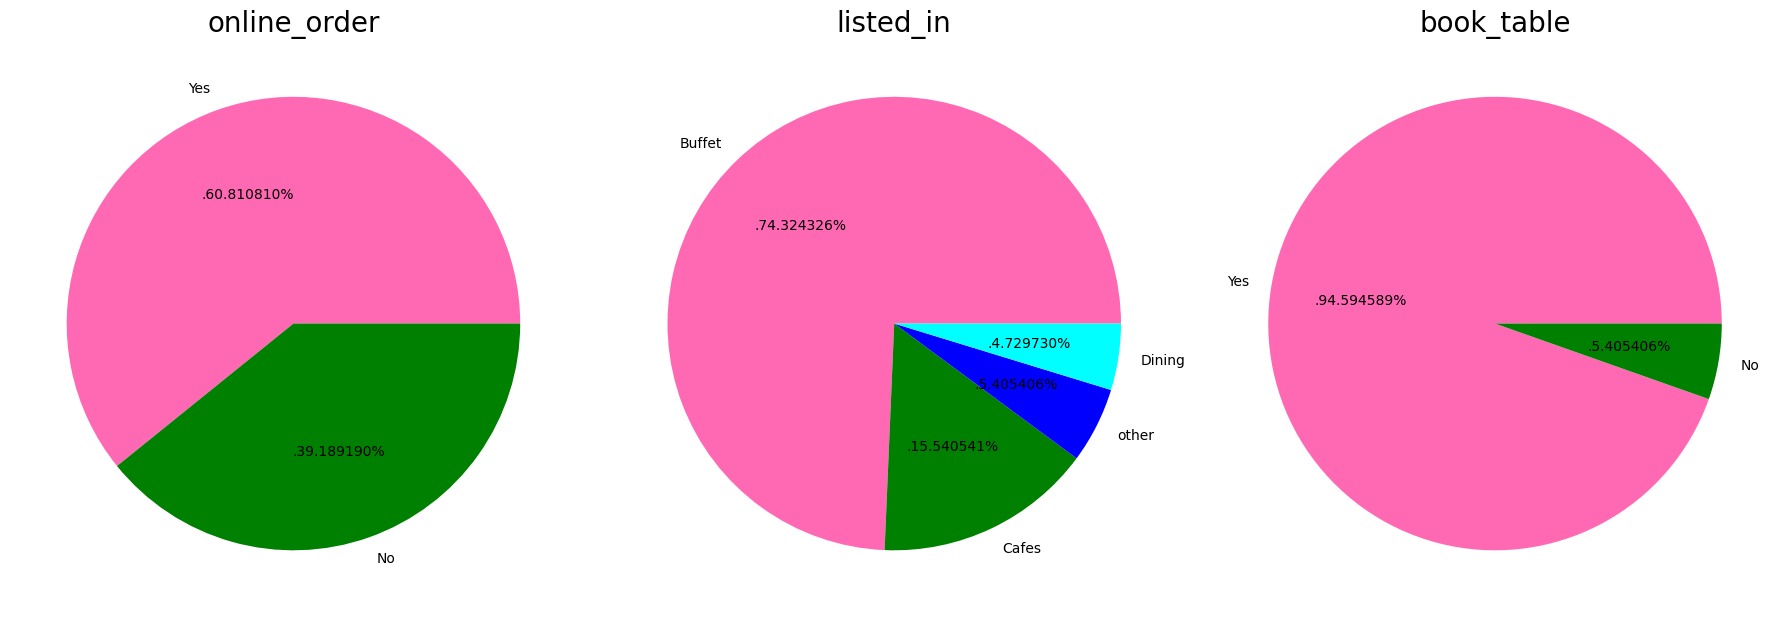

In [33]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['online_order'].value_counts()
labels = 'Yes', 'No'
color = ['hotpink','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('online_order', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['listed_in'].value_counts()
labels = 'Buffet', 'Cafes','other','Dining'
color = ['hotpink', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('listed_in', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['book_table'].value_counts()
labels = 'Yes', 'No'
color = ['hotpink','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('book_table', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- 1st pieplot shows that 60% orders are placed online and 39% are not online
- 2nd pieplot shows that 74% orders are for Buffet type, 15% are for Cafes, 5.4% are for other and 4.7% are for Dining
- 3rd pieplot shows that 94.5% people go to reataurant by booking the table in advance and 5.4% do not book in advance

#### 4.4 Feature Wise Visualization
#### 4.4.1 online_order COLUMN
- How is distribution of online_order ?

#### UNIVARIATE ANALYSIS ( How is distribution of online_order ? )

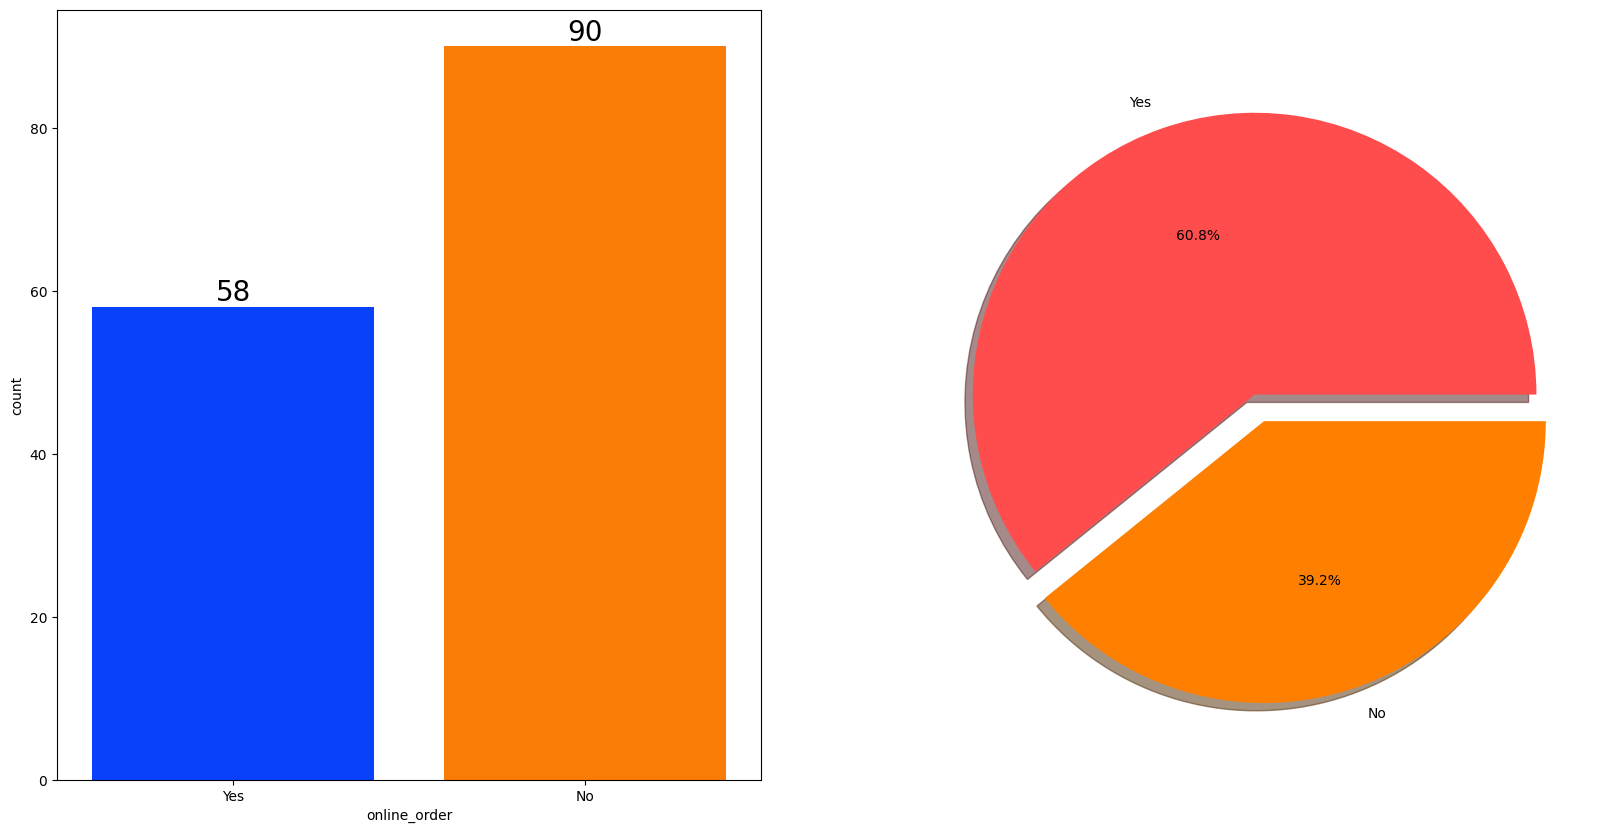

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['online_order'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['online_order'].value_counts(),labels=['Yes','No'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [35]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost,listed_in,total,average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1579.1,526.366667


In [36]:
online_order_group = df.groupby('online_order').agg({'votes': 'mean', 'rate': 'mean'})


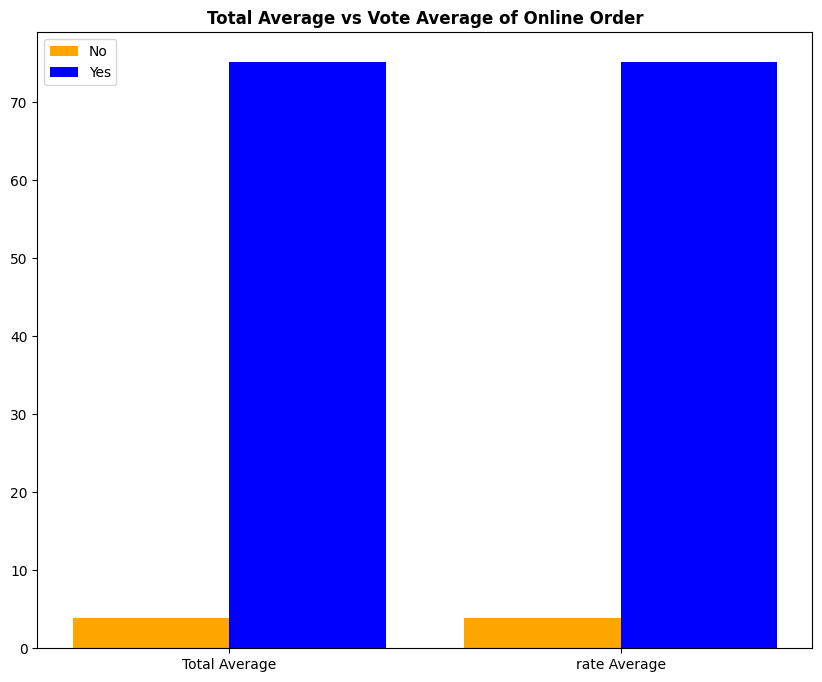

In [44]:
import matplotlib.pyplot as plt
import numpy as np

online_order_group = df.groupby('online_order').agg({'votes': 'mean', 'rate': 'mean'})

# X-axis labels
X = ['Total Average', 'rate Average']

# Data for Yes and No
online_order_Yes = [online_order_group['votes'][0], online_order_group['votes'][0]]  # Lowercase 'average'
online_order_No = [online_order_group['rate'][1], online_order_group['rate'][1]]   # Lowercase 'average'

# Set up the plot
plt.figure(figsize=(10, 8))

# X-axis positions
X_axis = np.arange(len(X))

# Plot bars
plt.bar(X_axis - 0.2, online_order_No, 0.4, label='No', color='orange')
plt.bar(X_axis + 0.2, online_order_Yes, 0.4, label='Yes', color='blue')

# Customize X-axis labels
plt.xticks(X_axis, X)

# Plot title and legend
plt.title("Total Average vs Vote Average of Online Order", fontweight='bold')
plt.legend()

# Show the plot
plt.show()



#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 Listed_in COLUMN
- How is Group wise distribution ?


#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

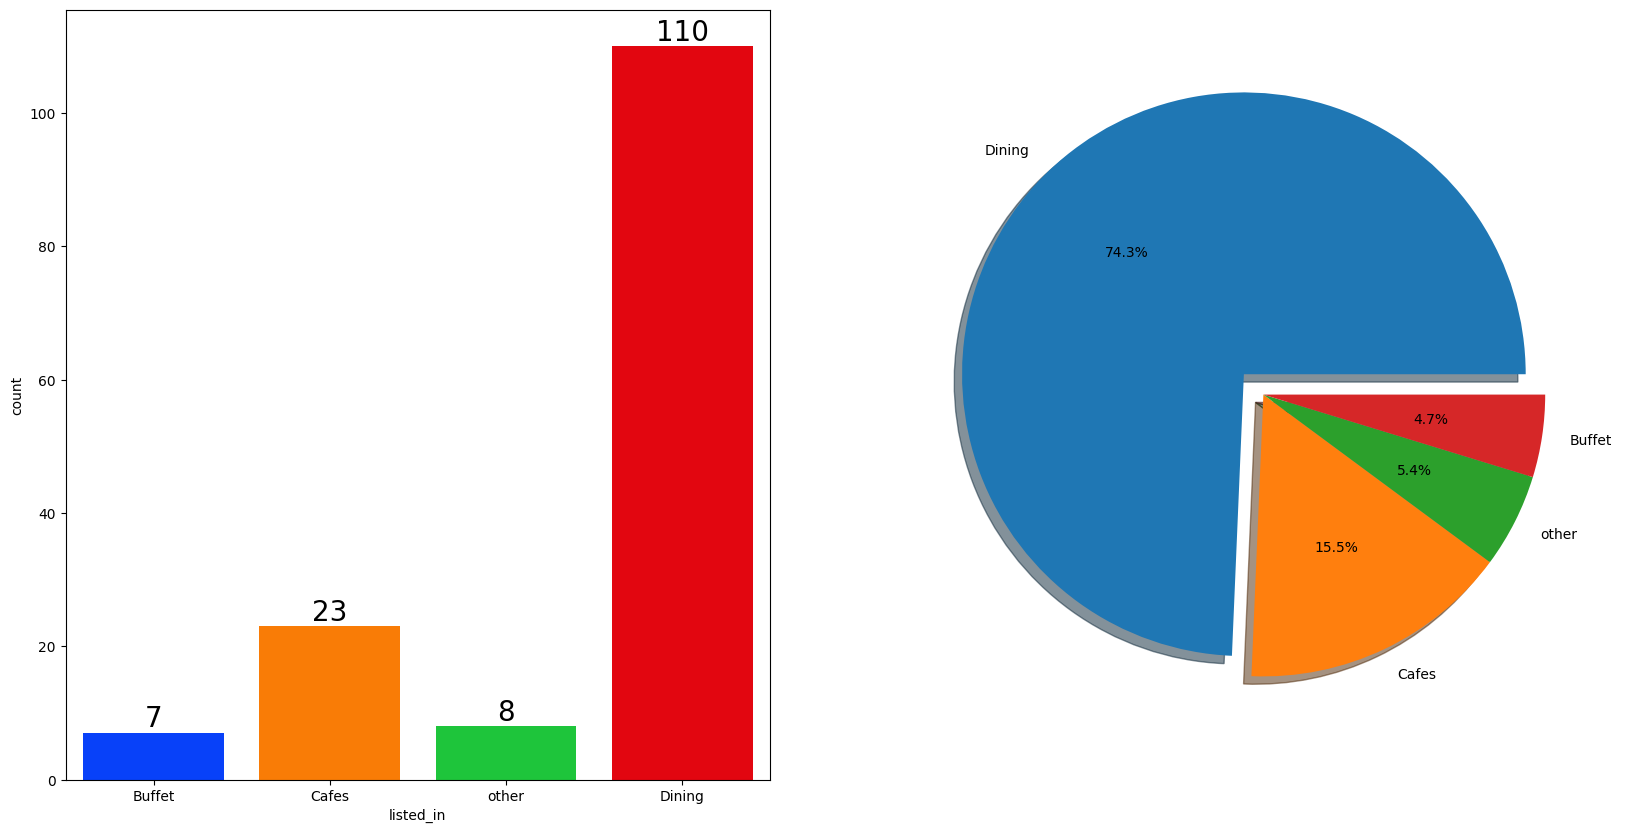

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['listed_in'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

# Pie chart
value_counts = df['listed_in'].value_counts()  # Get counts of 'listed_in'
labels = value_counts.index                    # Labels for pie chart
explode = [0.1] + [0] * (len(labels) - 1)      # Dynamically set explode for the first slice only

# Plot the pie chart
plt.pie(x=value_counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
    
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS 

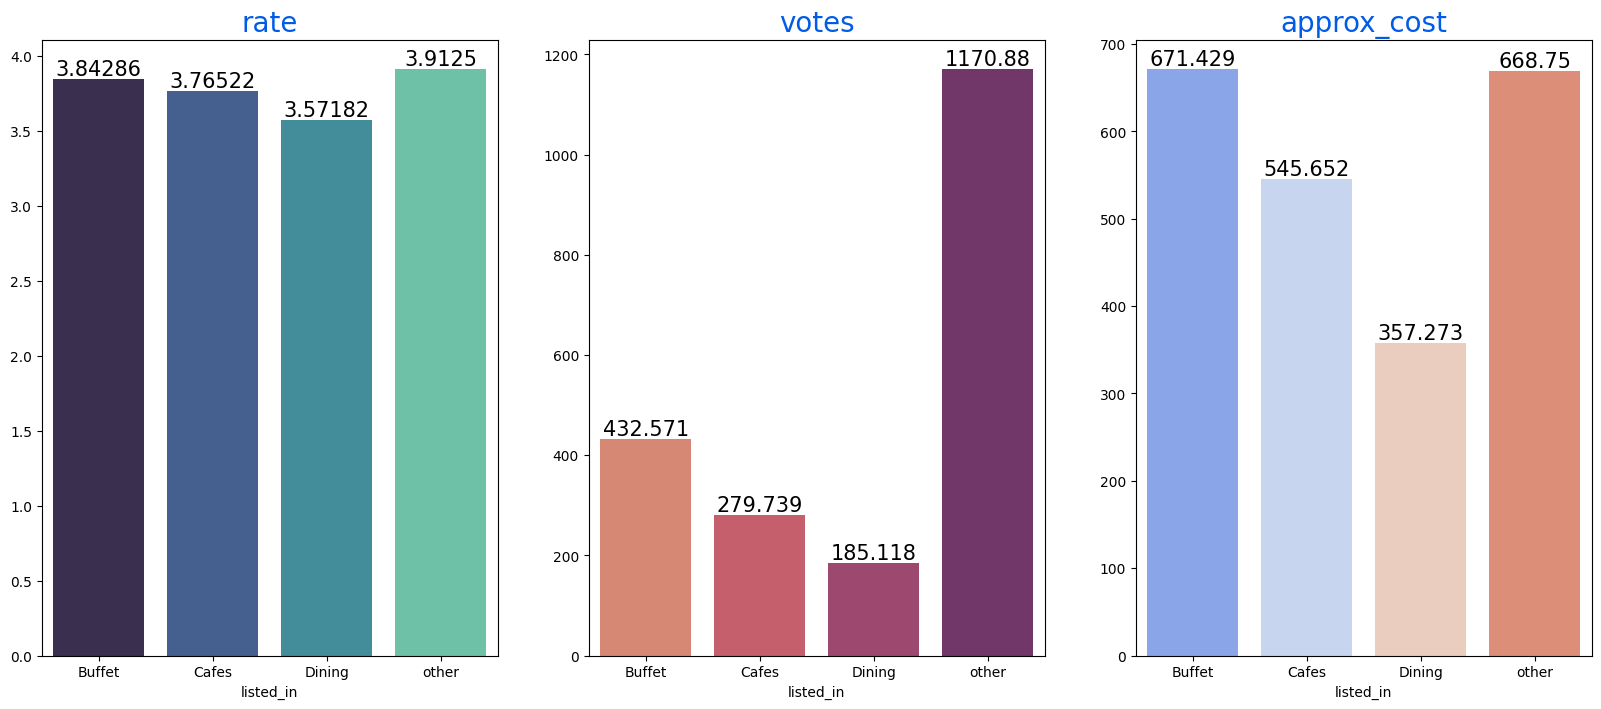

In [46]:
Group_data2=df.groupby('listed_in')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['rate'].mean().index,y=Group_data2['rate'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('rate',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['votes'].mean().index,y=Group_data2['votes'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('votes',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['approx_cost'].mean().index,y=Group_data2['approx_cost'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('approx_cost',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

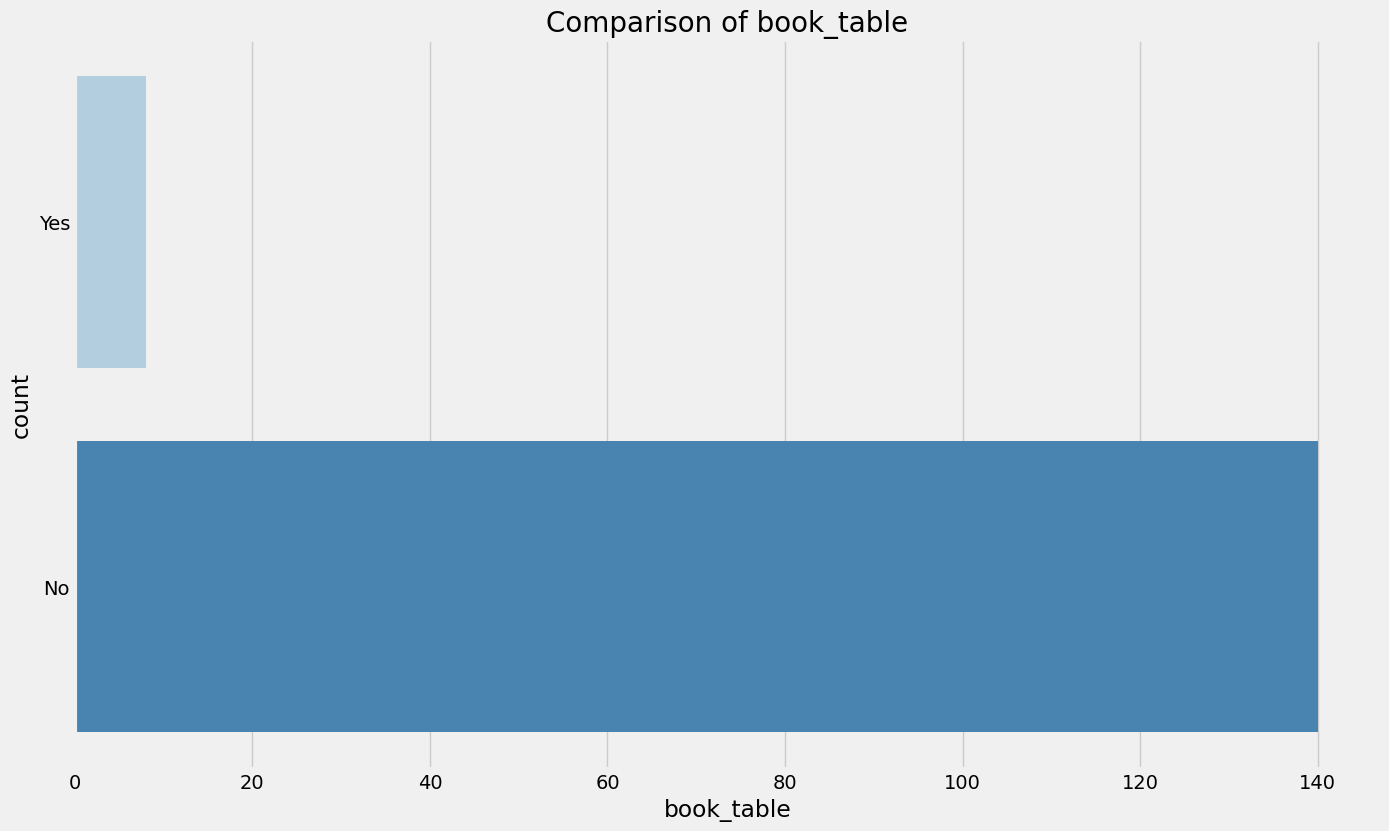

In [47]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['book_table'], palette = 'Blues')
plt.title('Comparison of book_table', fontweight = 30, fontsize = 20)
plt.xlabel('book_table')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

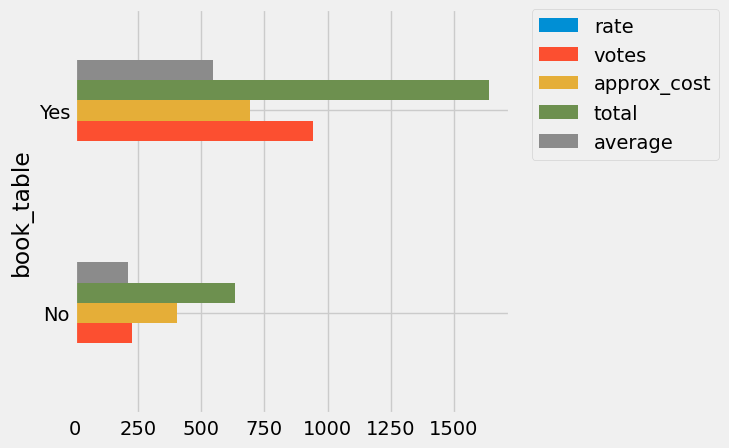

In [51]:
# Filter only numeric columns for aggregation
numeric_df = df.select_dtypes(include=['number'])

# Group by 'book_table' and compute mean only for numeric columns
numeric_df.groupby(df['book_table']).mean().plot(kind='barh', figsize=(5,5))

# Customize legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 online_order COLUMN 

#### UNIVARIATE ANALYSIS 

In [57]:
# Check available Matplotlib styles: You can check which styles are available by using:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


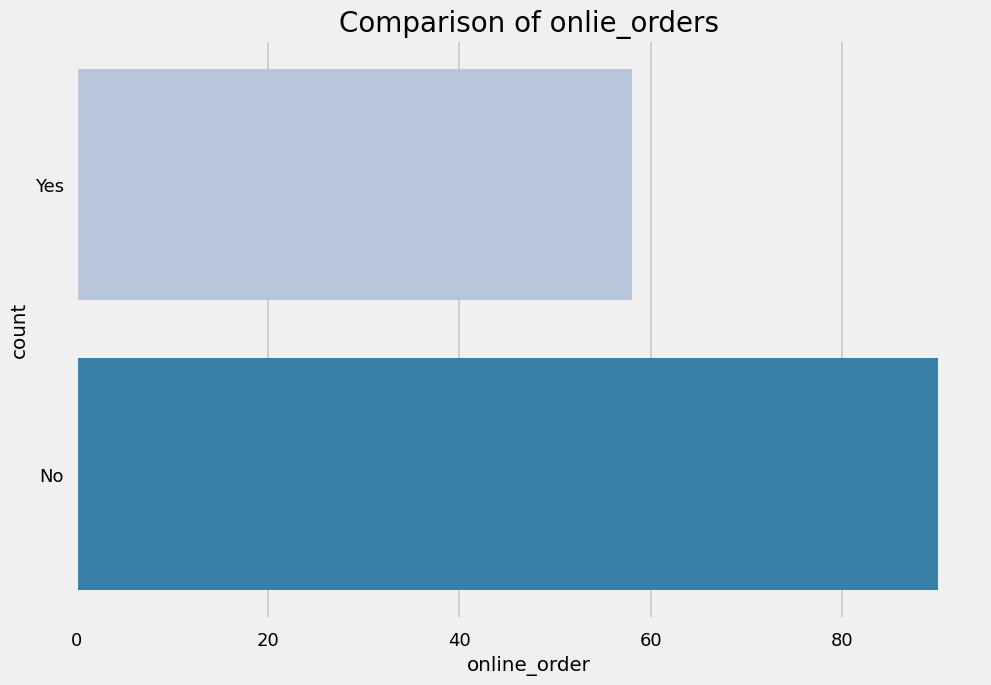

In [55]:
import os
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['online_order'], palette = 'PuBu')
plt.title('Comparison of onlie_orders', fontweight = 30, fontsize = 20)
plt.xlabel('online_order')
plt.ylabel('count')
plt.show()

#### Insights 
- Total online orders are 58 and offline are 90

#### BIVARIATE ANALYSIS 

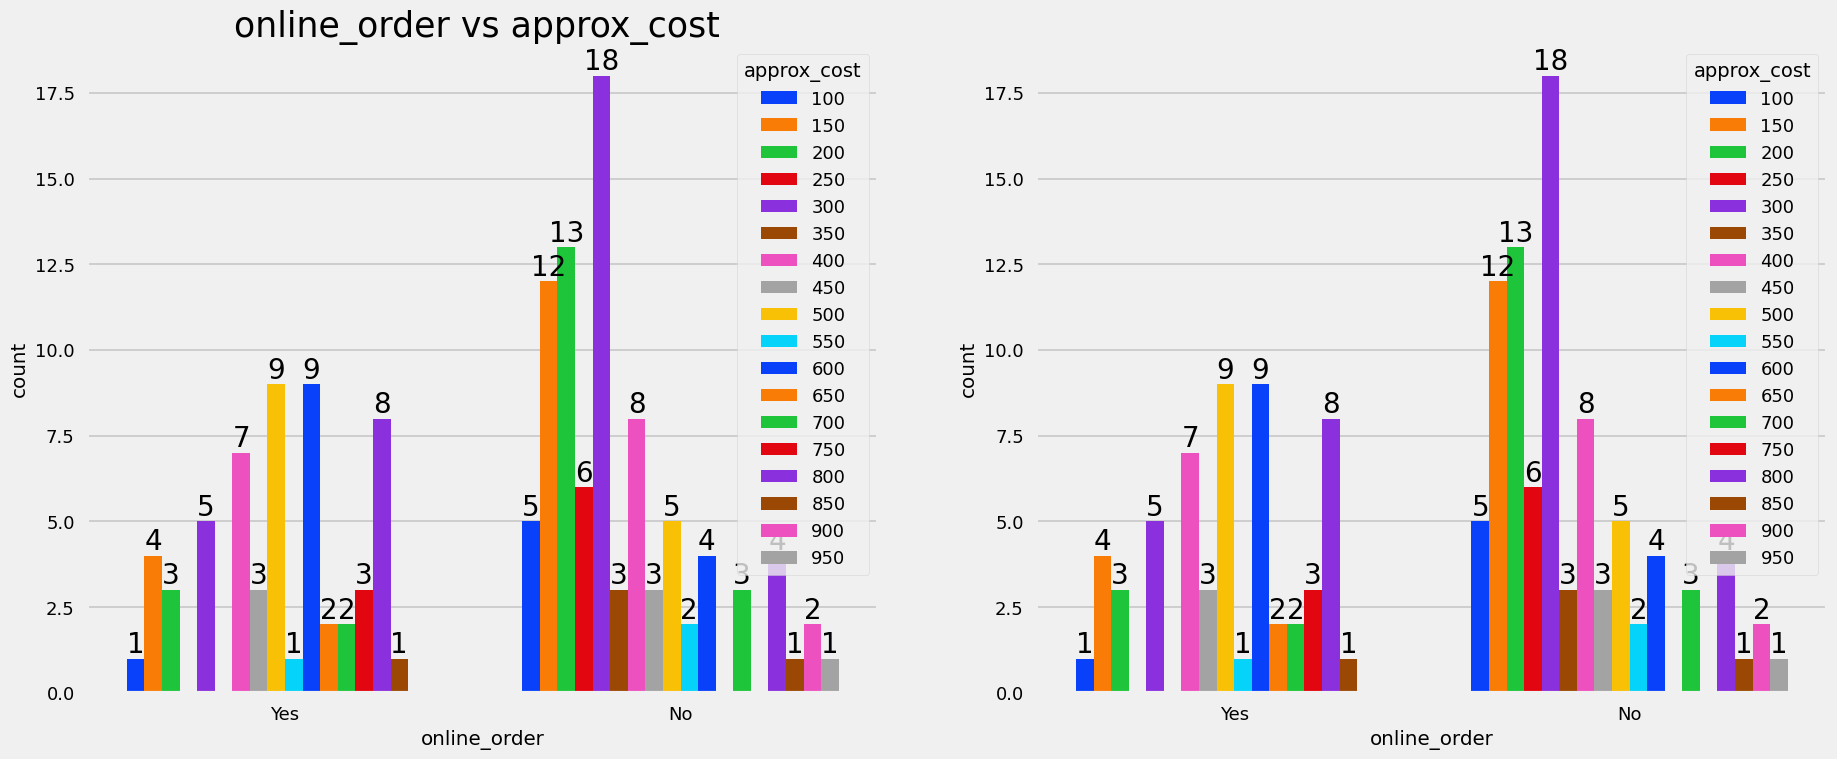

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['online_order'],data=df,palette = 'bright',hue='approx_cost',saturation=0.95,ax=ax[0])
ax[0].set_title('online_order vs approx_cost ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['online_order'],data=df,palette = 'bright',hue='approx_cost',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Maximum number of orders placed by people are upto Rs.300 

#### 4.4.5 listed_in COLUMN 
- Which type of order style is most common amoung customers ?

#### BIVARIATE ANALYSIS 

<Axes: xlabel='online_order', ylabel='approx_cost'>

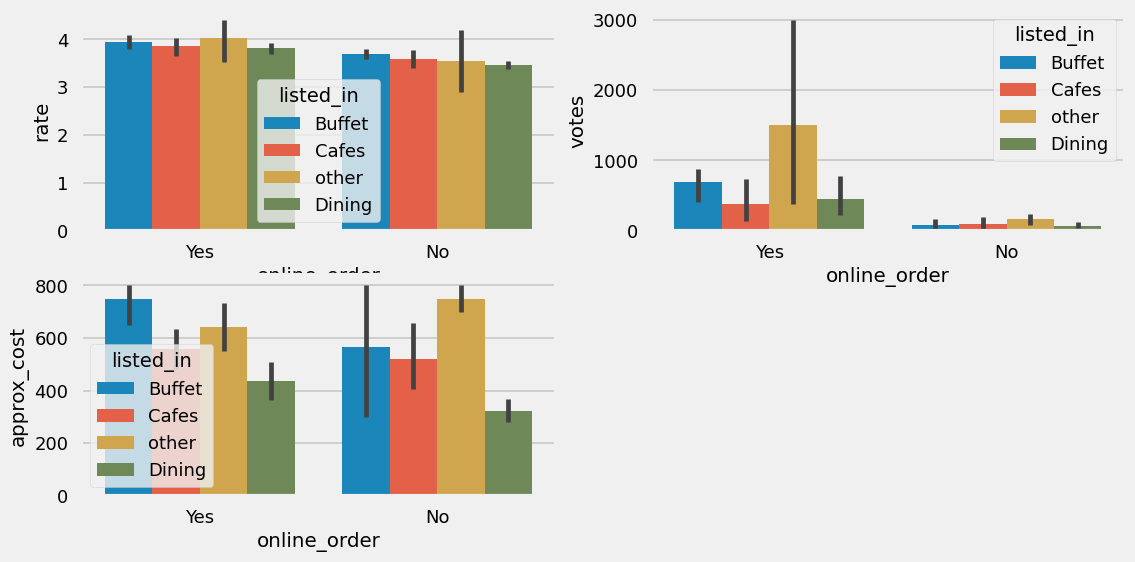

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['online_order'], y=df['rate'], hue=df['listed_in'])
plt.subplot(2,2,2)
sns.barplot (x=df['online_order'], y=df['votes'], hue=df['listed_in'])
plt.subplot(2,2,3)
sns.barplot (x=df['online_order'], y=df['approx_cost'], hue=df['listed_in'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

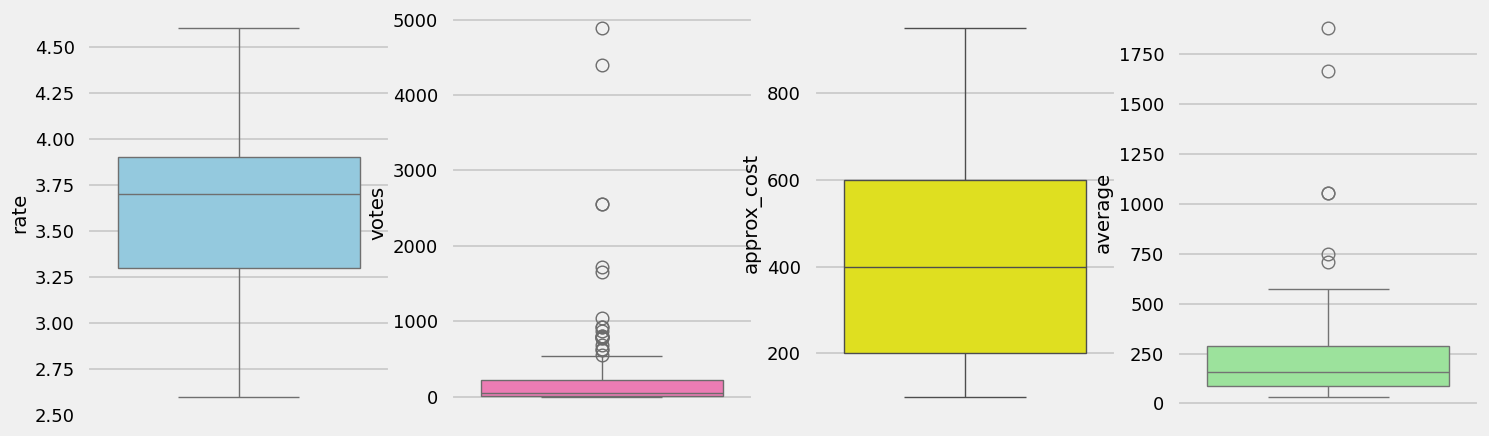

In [62]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['rate'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['votes'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['approx_cost'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

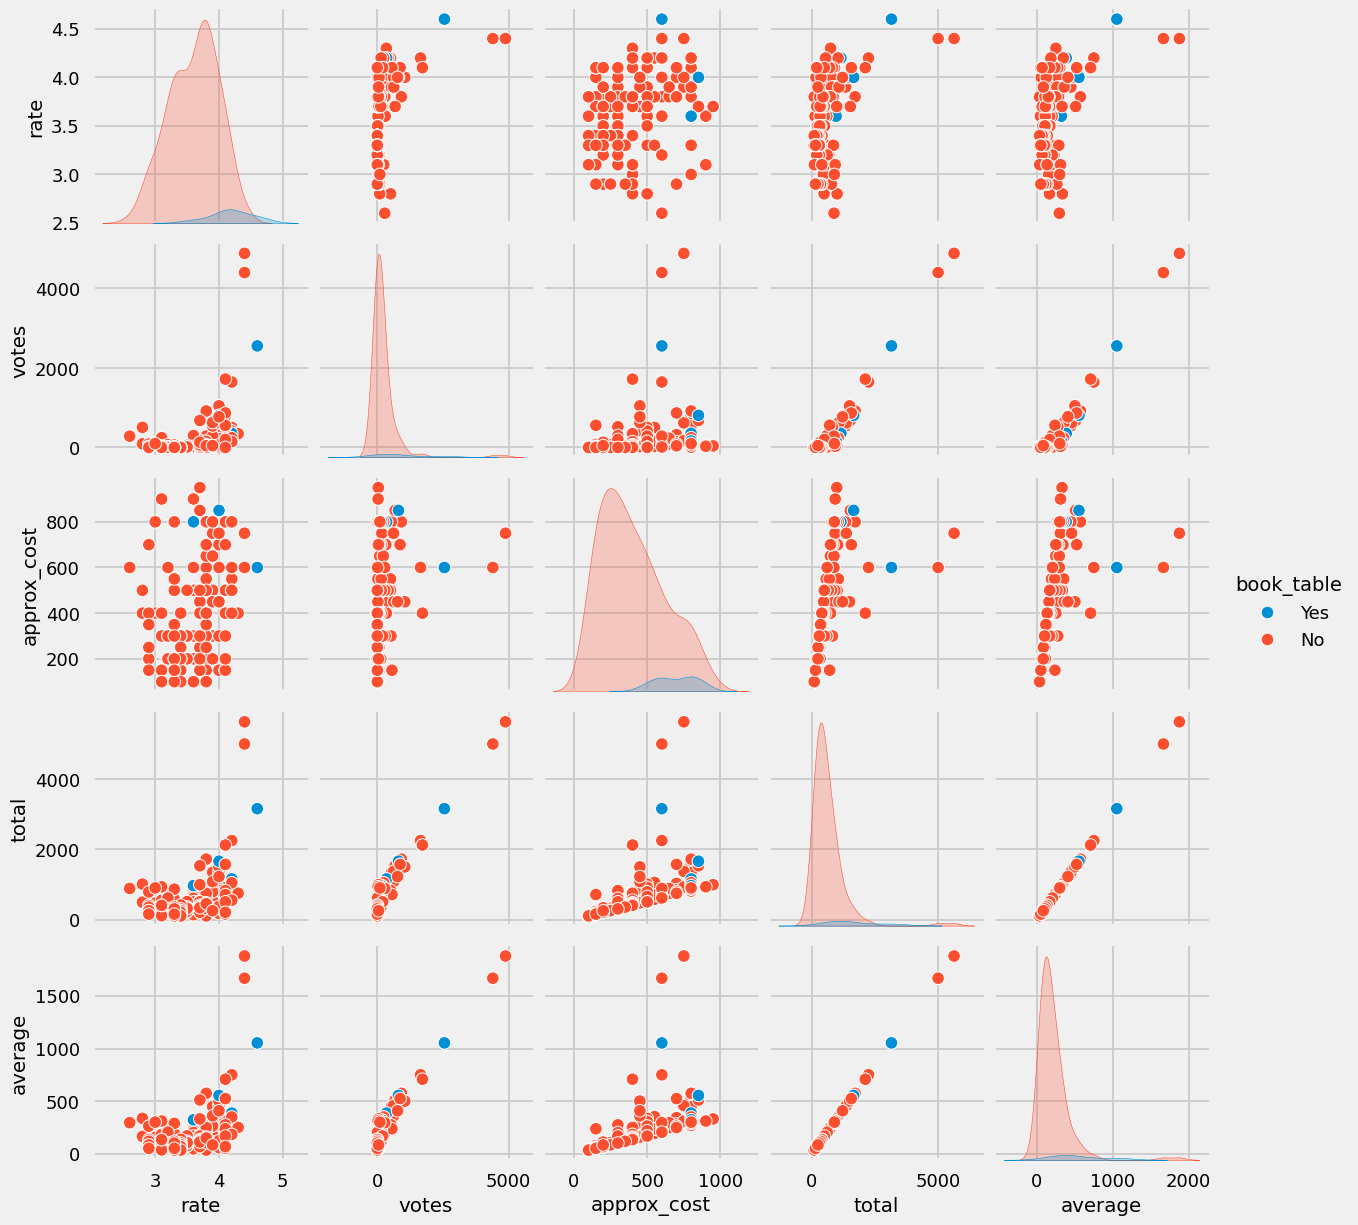

In [63]:
sns.pairplot(df,hue = 'book_table')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.